In [20]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['GOOG', 'AAPL']

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

parsed_data = []

news_tables 

{'GOOG': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
 <tr><td align="right" width="130">Jun-03-23 10:00AM</td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/m/b5476344-8613-3c67-9f25-d4ec2683c500/here%E2%80%99s-what-investors-should.html" onclick="trackAndOpenNews(event, 'The Wall Street Journal', 'https://finance.yahoo.com/m/b5476344-8613-3c67-9f25-d4ec2683c500/here%E2%80%99s-what-investors-should.html');" rel="nofollow" target="_blank">Heres What Investors Should Know as Actively Managed ETFs Take Off</a></div><div class="news-link-right"><span>(The Wall Street Journal)</span></div></div></td></tr>
 <tr><td align="right" width="130">Jun-01-23 04:24PM</td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/video/trillion-dollar-companies-wealthy-ceos-202

In [29]:
news_table.findAll('tr')[0].td.text.split(' ')

['Jun-03-23', '10:00AM']

In [35]:
for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

AttributeError: 'NoneType' object has no attribute 'text'

In [54]:
for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):
        if row.a is None:
            continue 
        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
df

,ticker,date,time,title
0,GOOG,Jun-03-23,10:00AM,Heres What Investors Should Know as Actively M...
1,GOOG,Jun-01-23,04:24PM,Trillion-dollar companies: How wealthy are the...
2,GOOG,Jun-01-23,03:30PM,Stock market gains powered by just a few stocks
3,GOOG,Jun-01-23,10:42AM,C3.ai stock plummets after forecast disappoints
4,GOOG,Jun-01-23,06:40AM,"Business May Be Slowing, but Earnings Manageme..."
...,...,...,...,...
620,AAPL,May-31-23,05:15AM,"Apple, Alphabet, Meta, and Microsoft Have All ..."
621,AAPL,May-30-23,11:47PM,"Foxconn sees AI driving strong server demand, ..."
622,AAPL,May-30-23,07:21PM,Analyst Report: Apple Inc.
623,AAPL,May-30-23,05:11PM,Dow Jones Today: Index Down on Debt Ceiling Ji...


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ticker    625 non-null    object 
 1   date      625 non-null    object 
 2   time      625 non-null    object 
 3   title     625 non-null    object 
 4   compound  625 non-null    float64
dtypes: float64(1), object(4)
memory usage: 24.5+ KB


In [62]:
df.groupby(['ticker', 'date']).mean().unstack()

C:\Users\adity\AppData\Local\Temp\ipykernel_19596\1508129589.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['ticker', 'date']).mean().unstack()


compound                                                         \
date   2023-05-02 2023-05-03 2023-05-04 2023-05-05 2023-05-06 2023-05-08   
ticker                                                                     
AAPL          NaN        NaN        NaN        NaN        NaN        NaN   
GOOG          0.0     0.1204   -0.18372    -0.1511     0.4063  -0.119175   

                                                    ...                        \
date   2023-05-09 2023-05-10 2023-05-11 2023-05-12  ... 2023-05-24 2023-05-25   
ticker                                              ...                         
AAPL          NaN        NaN        NaN        NaN  ...        NaN        NaN   
GOOG     -0.13292    0.00743    0.02766   -0.30235  ...  -0.031233      0.148   

                                                                          \
date   2023-05-26 2023-05-27 2023-05-29 2023-05-30 2023-05-31 2023-06-01   
ticker                                                                     
AAPL          NaN        NaN        NaN  -0.033725   0.155435   0.025523   
GOOG     -0.07435    -0.7096   0.197333   0.063360   0.006783   0.110754   

                              
date   2023-06-02 2023-06-03  
ticker                        
AAPL     0.118391    0.03532  
GOOG          NaN    0.31820  

[2 rows x 28 columns]

C:\Users\adity\AppData\Local\Temp\ipykernel_19596\4035586637.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = df.groupby(['ticker', 'date']).mean().unstack()


<Figure size 1000x800 with 0 Axes>

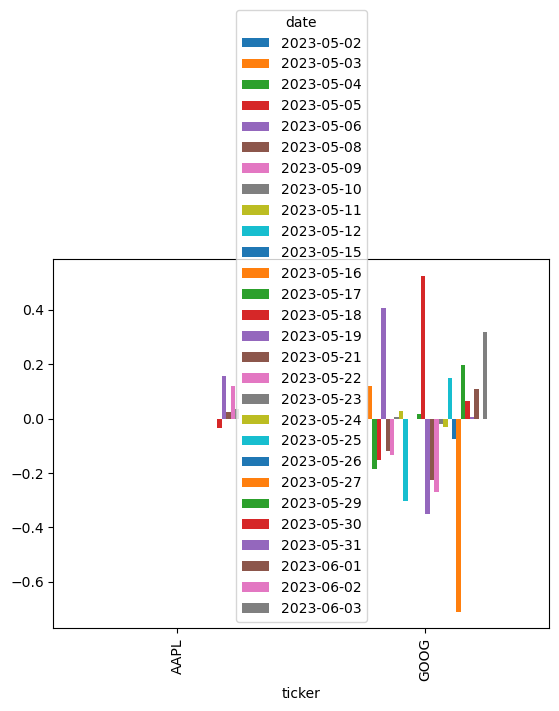

In [60]:
vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

plt.figure(figsize=(10,8))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar')
plt.show()


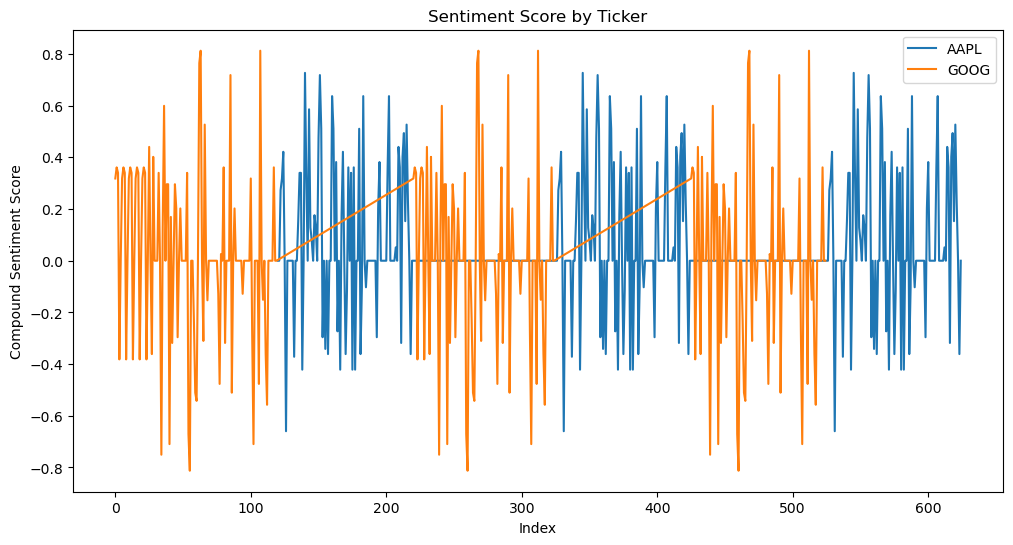

In [63]:
import matplotlib.pyplot as plt

# Group the data by ticker
grouped_data = df.groupby('ticker')

# Plot the sentiment score for each ticker
fig, ax = plt.subplots(figsize=(12, 6))

for ticker, group in grouped_data:
    ax.plot(group.index, group['compound'], label=ticker)

# Customize the plot
ax.set_xlabel('Index')
ax.set_ylabel('Compound Sentiment Score')
ax.set_title('Sentiment Score by Ticker')
ax.legend()

# Show the plot
plt.show()


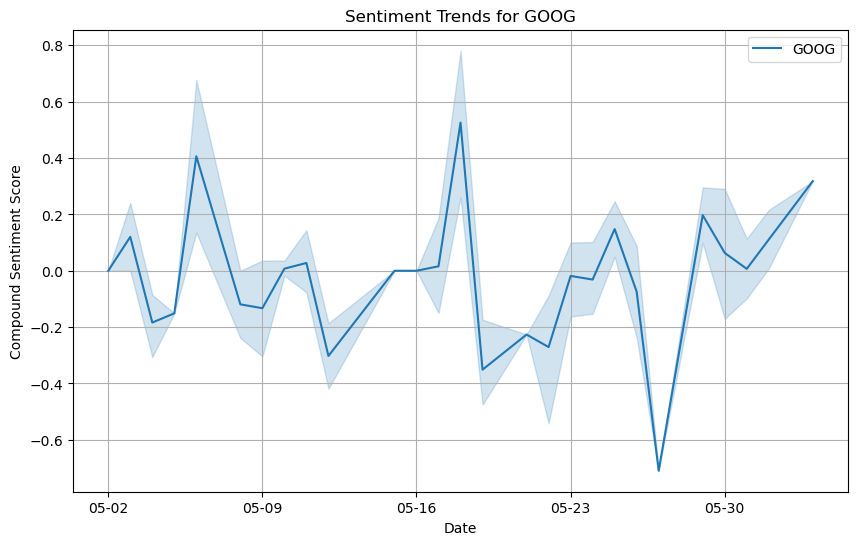

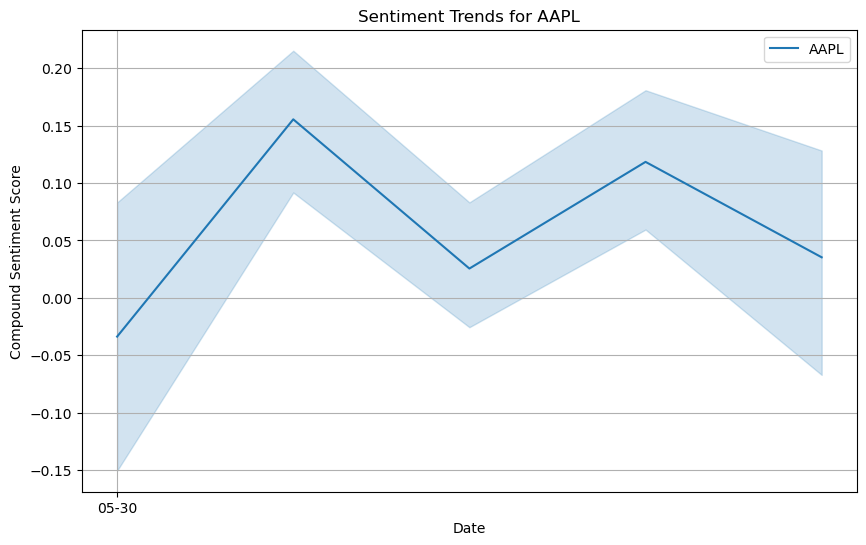

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# Ensure that the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# List of unique tickers
tickers = df['ticker'].unique()

# Plotting
for ticker in tickers:
    fig, ax = plt.subplots(figsize=(10, 6))
    df_ticker = df[df['ticker'] == ticker]
    sns.lineplot(x='date', y='compound', data=df_ticker, ax=ax, label=ticker)
    
    # Formatting the x-axis as dates
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))
    
    plt.title(f'Sentiment Trends for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Compound Sentiment Score')
    plt.legend()
    plt.grid(True)
    plt.show()


In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named df
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# Set datetime as index
df.set_index('datetime', inplace=True)

# Create a new DataFrame where we group by ticker and resample daily, 
# filling any missing data with the previous valid value (forward fill)
df_resampled = df.groupby('ticker').resample('D').ffill()

# Get unique tickers
tickers = df['ticker'].unique()

# Plot each ticker's compound sentiment score over time
for ticker in tickers:
    plt.figure(figsize=(10,6))
    df_resampled[df_resampled['ticker'] == ticker]['compound'].plot(label=ticker)
    plt.xlabel('Date')
    plt.ylabel('Compound Sentiment Score')
    plt.title(f'Compound Sentiment Score Over Time for {ticker}')
    plt.legend()
    plt.show()


TypeError: unsupported operand type(s) for +: 'datetime.date' and 'str'